In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import pandas as pd
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from matplotlib import pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import csv
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
import mdshare
import pyemma
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from threading import Timer
#import msmtools.analysis as msmana
#import msmtools
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm

T=310
k=1.380649e-23 




In [2]:
comps = []
with open('project.dat', 'r') as file:
    my_reader = csv.reader(file, delimiter='\t')
    for row in my_reader:
        fields = row[0].split()
        if not fields[0].startswith("#"):
            comps.append(fields[1:])

In [3]:
comps = np.array(comps)
comp1 = comps[:,0].astype(float)
comp2 = comps[:,1].astype(float)
comp3 = comps[:,2].astype(float)
comp4 = comps[:,3].astype(float)
comp5 = comps[:,4].astype(float)
comp6 = comps[:,5].astype(float)
comp7 = comps[:,6].astype(float)
comp8 = comps[:,7].astype(float)
comp9 = comps[:,8].astype(float)
comp10 = comps[:,9].astype(float)





Text(0.5, 1.0, 'PCA1')

<Figure size 1200x1050 with 0 Axes>

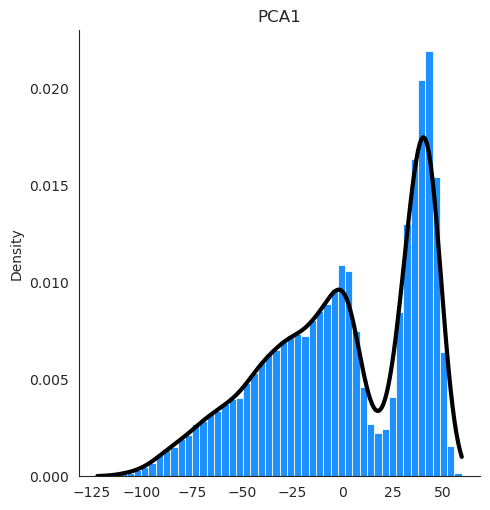

In [4]:
sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp1, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA1")


sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp2, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA2")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp3, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA3")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp4, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA4")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp5, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA5")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp6, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA6")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp7, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA7")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp8, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA8")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp9, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA9")

sns.set_style("white")
kwargs = dict(kde=True, line_kws={'lw': 3})
plt.figure(figsize=(4,3.5), dpi= 300)
sns.displot(comp10, color="black", bins=50, facecolor="dodgerblue", stat='density', **kwargs)
plt.title("PCA10")

sns.set_style("white")
x = comp1
y = comp2

kwargs = dict( cmap=plt.cm.jet)
plt.figure(figsize=(4,3.5), dpi= 300)
_ = sns.kdeplot(x,y, **kwargs, shade=False, cbar=True, n_levels=11,  zorder=0, cbar_kws = dict(format = '%.3f'), fill=True)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.title("PCA1 vs PCA2")
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.savefig("PCA1vsPC2.png", format="png") 


In [5]:
traj_coord_A = comp1
traj_coord_B = comp2

In [6]:
comp1 = np.array(comp1)
comp2 = np.array(comp2)
dataset12 = pd.DataFrame({'comp2': comp2, 'comp1': list(comp1)}, columns=['comp1', 'comp2'])

In [7]:
dataset12

comp1   comp2
0      28.161  33.901
1      28.295  23.355
2      26.745  28.924
3      28.959  22.754
4      24.176  34.789
...       ...     ...
17495 -40.877   1.311
17496 -37.032 -15.813
17497 -36.618 -12.797
17498 -39.350  -7.121
17499 -53.001  -2.406

[17500 rows x 2 columns]

In [8]:
data12 = np.asarray(dataset12)

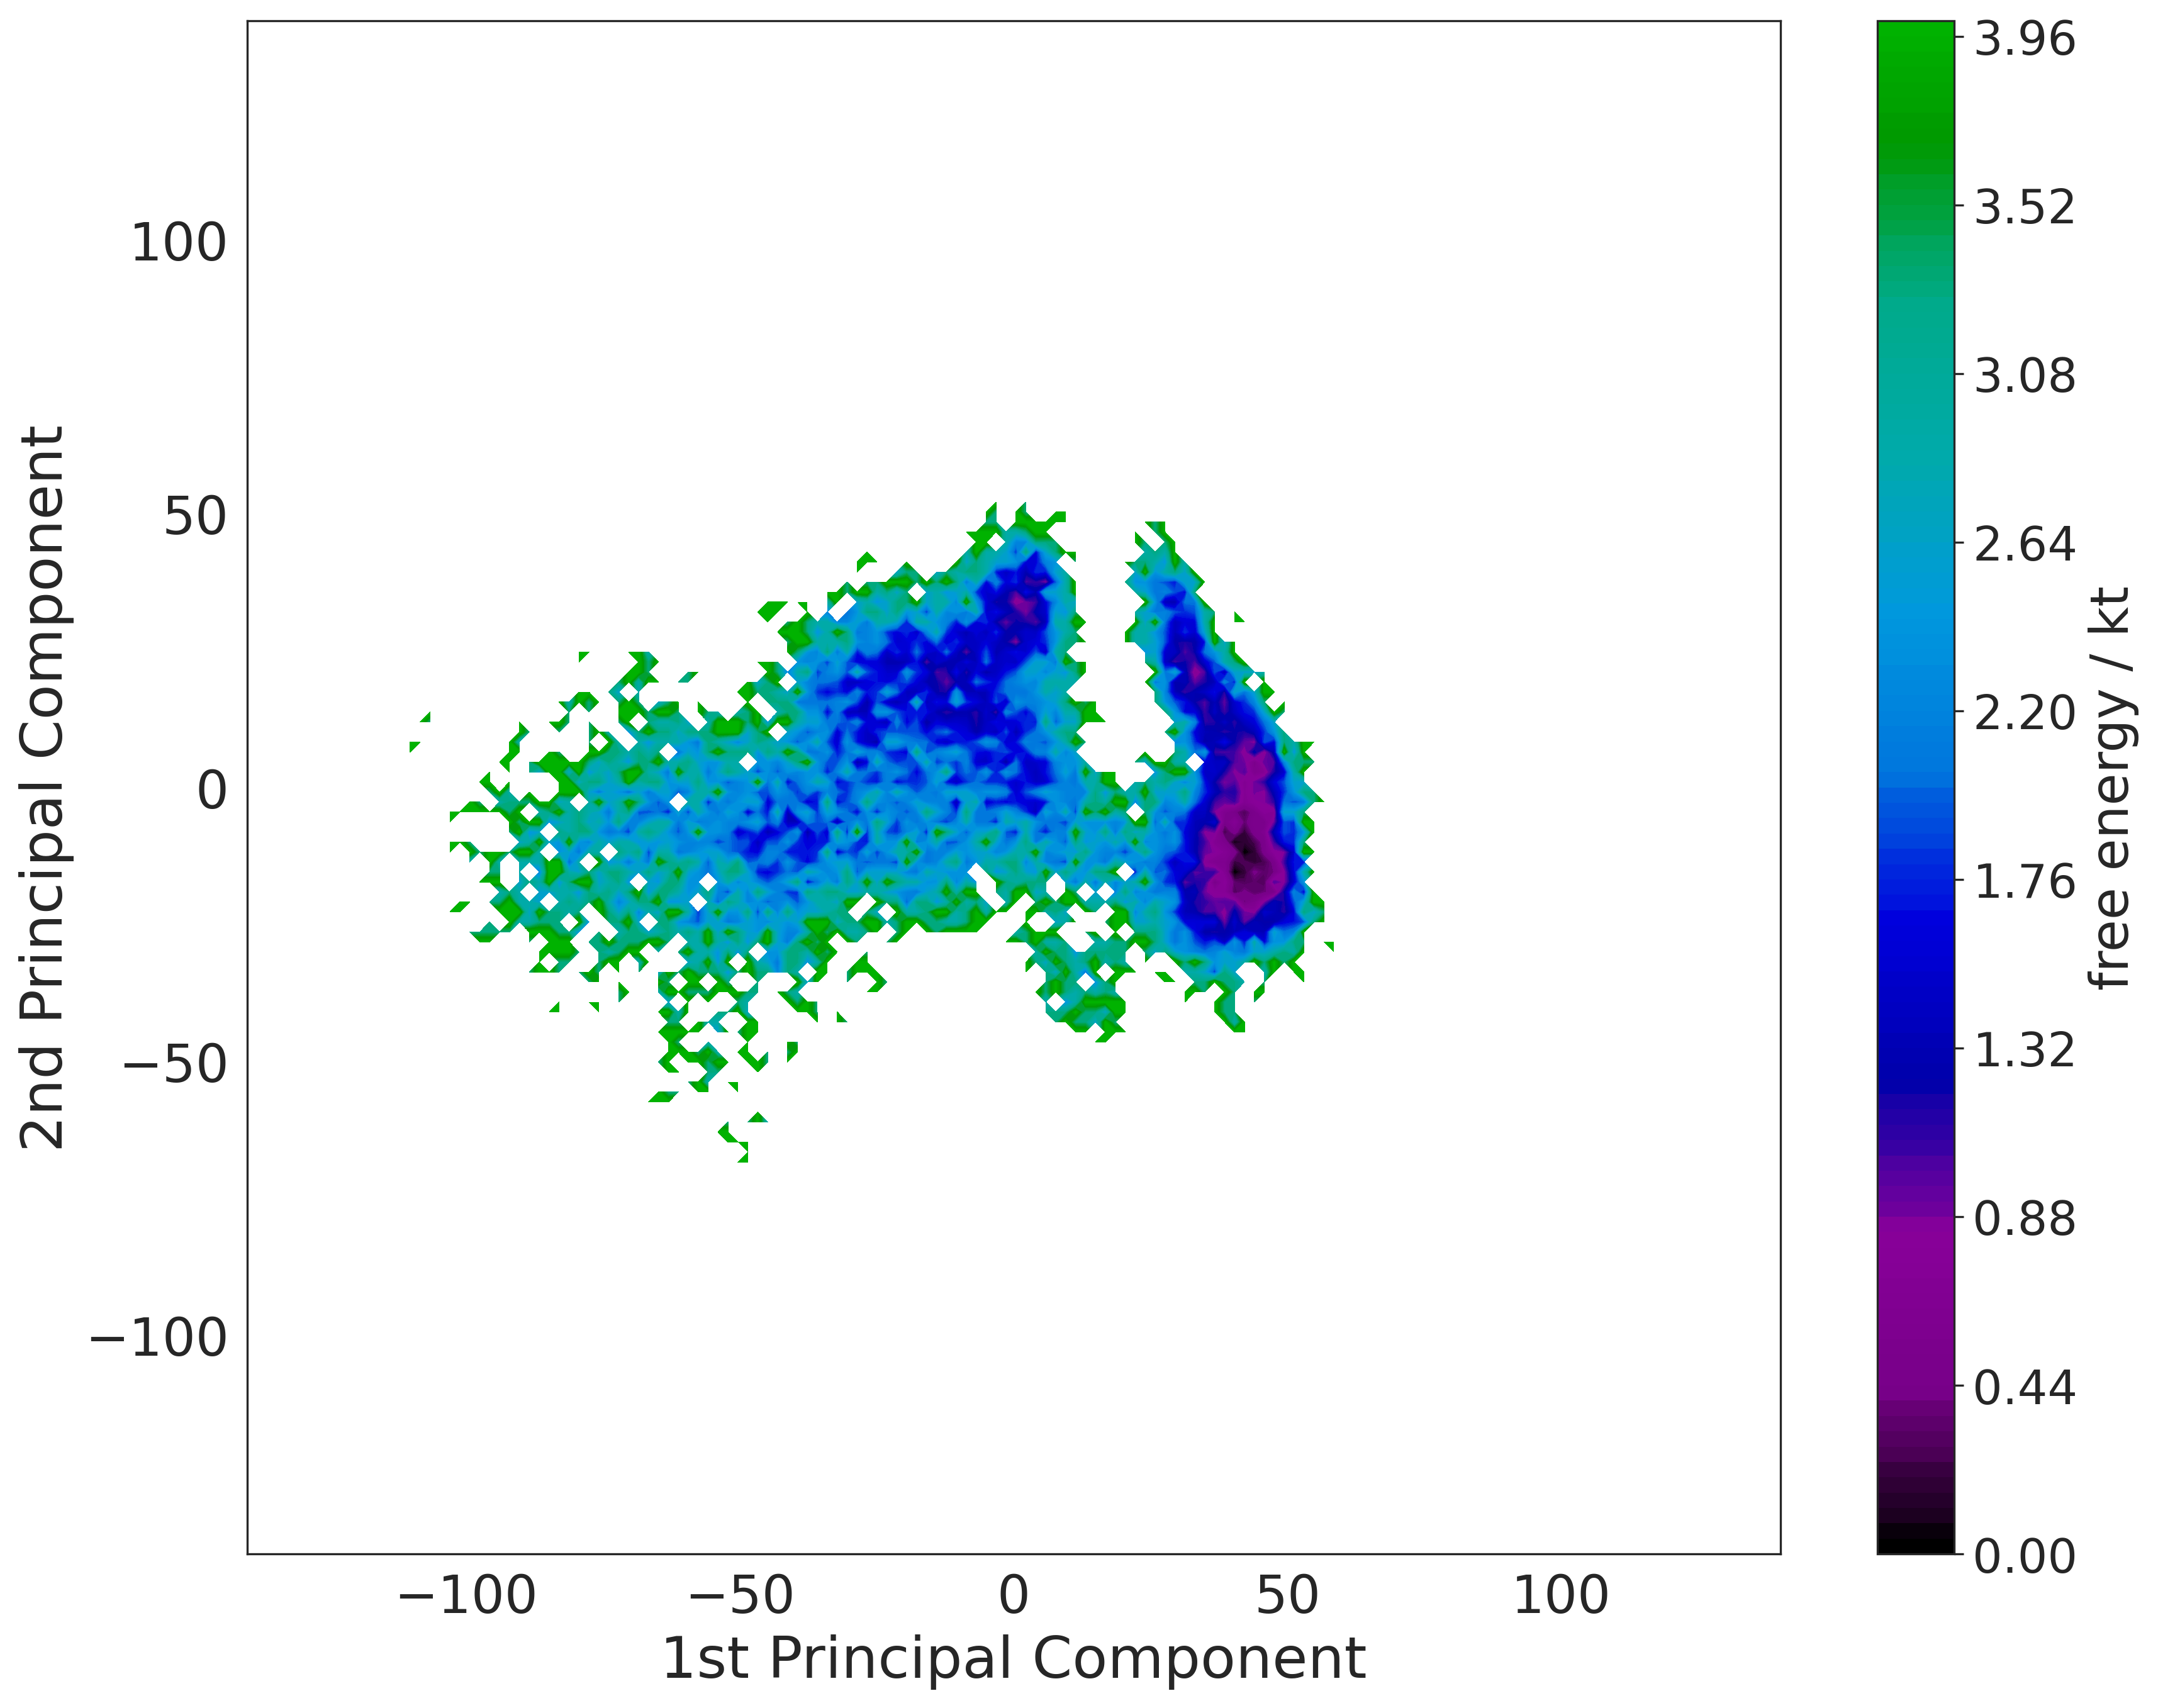

In [9]:
fig, ax, misc = pyemma.plots.plot_free_energy(*data12.T, legacy=False, nbins=100, ncontours=100, avoid_zero_count=False, cmap='nipy_spectral', vmin=0, vmax=8.2)
ax.set_xlabel('1st Principal Component', fontsize = 22)
ax.set_ylabel('2nd Principal Component', fontsize = 22)
ax.set_xlim(-140,140)
ax.set_ylim(-140,140)
ax.set_aspect('equal')


fig.tight_layout()
fig = plt.gcf()
fig.set_size_inches(12, 10)
fig.set_dpi(300)


# Set font size for tick labels on the axes
ax.tick_params(axis='both', which='major', labelsize=20)

# Set font size for colorbar labels and tick labels
cbar = misc['cbar']
cbar.ax.tick_params(labelsize = 18)  # Set font size for colorbar tick labels
cbar.ax.set_ylabel("free energy / kt", fontsize=20)  # Set font size for colorbar label

plt.savefig("FE_landscape_nadph.png", format="png") 

In [44]:
data12_1 = np.asarray(dataset12.iloc[1:3500])
data12_2 = np.asarray(dataset12.iloc[3501:7000])
data12_3 = np.asarray(dataset12.iloc[7001:10500])
data12_4 = np.asarray(dataset12.iloc[10501:14000])
data12_5 = np.asarray(dataset12.iloc[14001:17500])


In [45]:
frames=3500

In [46]:
replicas=5

plt.scatter(np.arange(250005),comp2)
plt.xlim([4000,4100])

In [47]:
cluster = pyemma.coordinates.cluster_kmeans([data12_1,data12_2,data12_3,data12_4,data12_5], k=100, max_iter=200, n_jobs=4, chunksize=10000, sparse=True)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

/home/jesus/anaconda3/envs/Jupyter/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /home/jesus/anaconda3/envs/Jupyter/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
100%|████████████████████████████████████████| 100/100 [00:00<00:00, 302.96it/s]

100%|████████████████████████████████████████| 200/200 [00:00<00:00, 604.98it/s]
/home/jesus/anaconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 279.40it/s]


In [48]:
dtrajs_concatenated

array([15, 15, 15, 54, 54, 25, 25, 15, 25, 15, 15, 15, 15, 15, 15, 40, 25,
       15, 15, 25, 54, 54, 54, 54, 25, 25, 25, 54, 77, 25, 54, 54, 25, 25,
       25, 25, 25, 54, 25, 25, 25, 25, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       25, 54, 54, 54, 25, 54, 54, 54, 54, 54, 54, 54, 15, 15, 25, 54, 25,
       54, 25, 25, 54, 25, 54, 54, 25, 54, 25, 54, 25, 54, 25, 54, 54, 54,
       54, 54, 25, 25, 54, 54, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 54,
       54, 25, 25, 54, 54, 25, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       25, 15, 25, 25, 54, 25, 25, 77, 40, 40, 15, 77, 77, 40, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 40, 15, 40, 40, 77, 25, 15, 77, 25, 77, 15,
       15, 77, 77, 77, 77, 77, 40, 77, 40, 77, 77, 40, 77, 25, 25, 25, 25,
       77,  2, 40,  2, 77, 77, 25, 77, 15, 25, 25, 25, 25, 25, 25, 25, 25,
       54, 25, 54, 54, 54, 54, 54, 54, 25, 25, 15, 25, 54, 54, 54, 54, 54,
       25, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 15, 15, 25

100%|███████████████████████████████████████████| 12/12 [00:05<00:00,  2.03it/s]


31-05-24 14:08:45 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[28] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


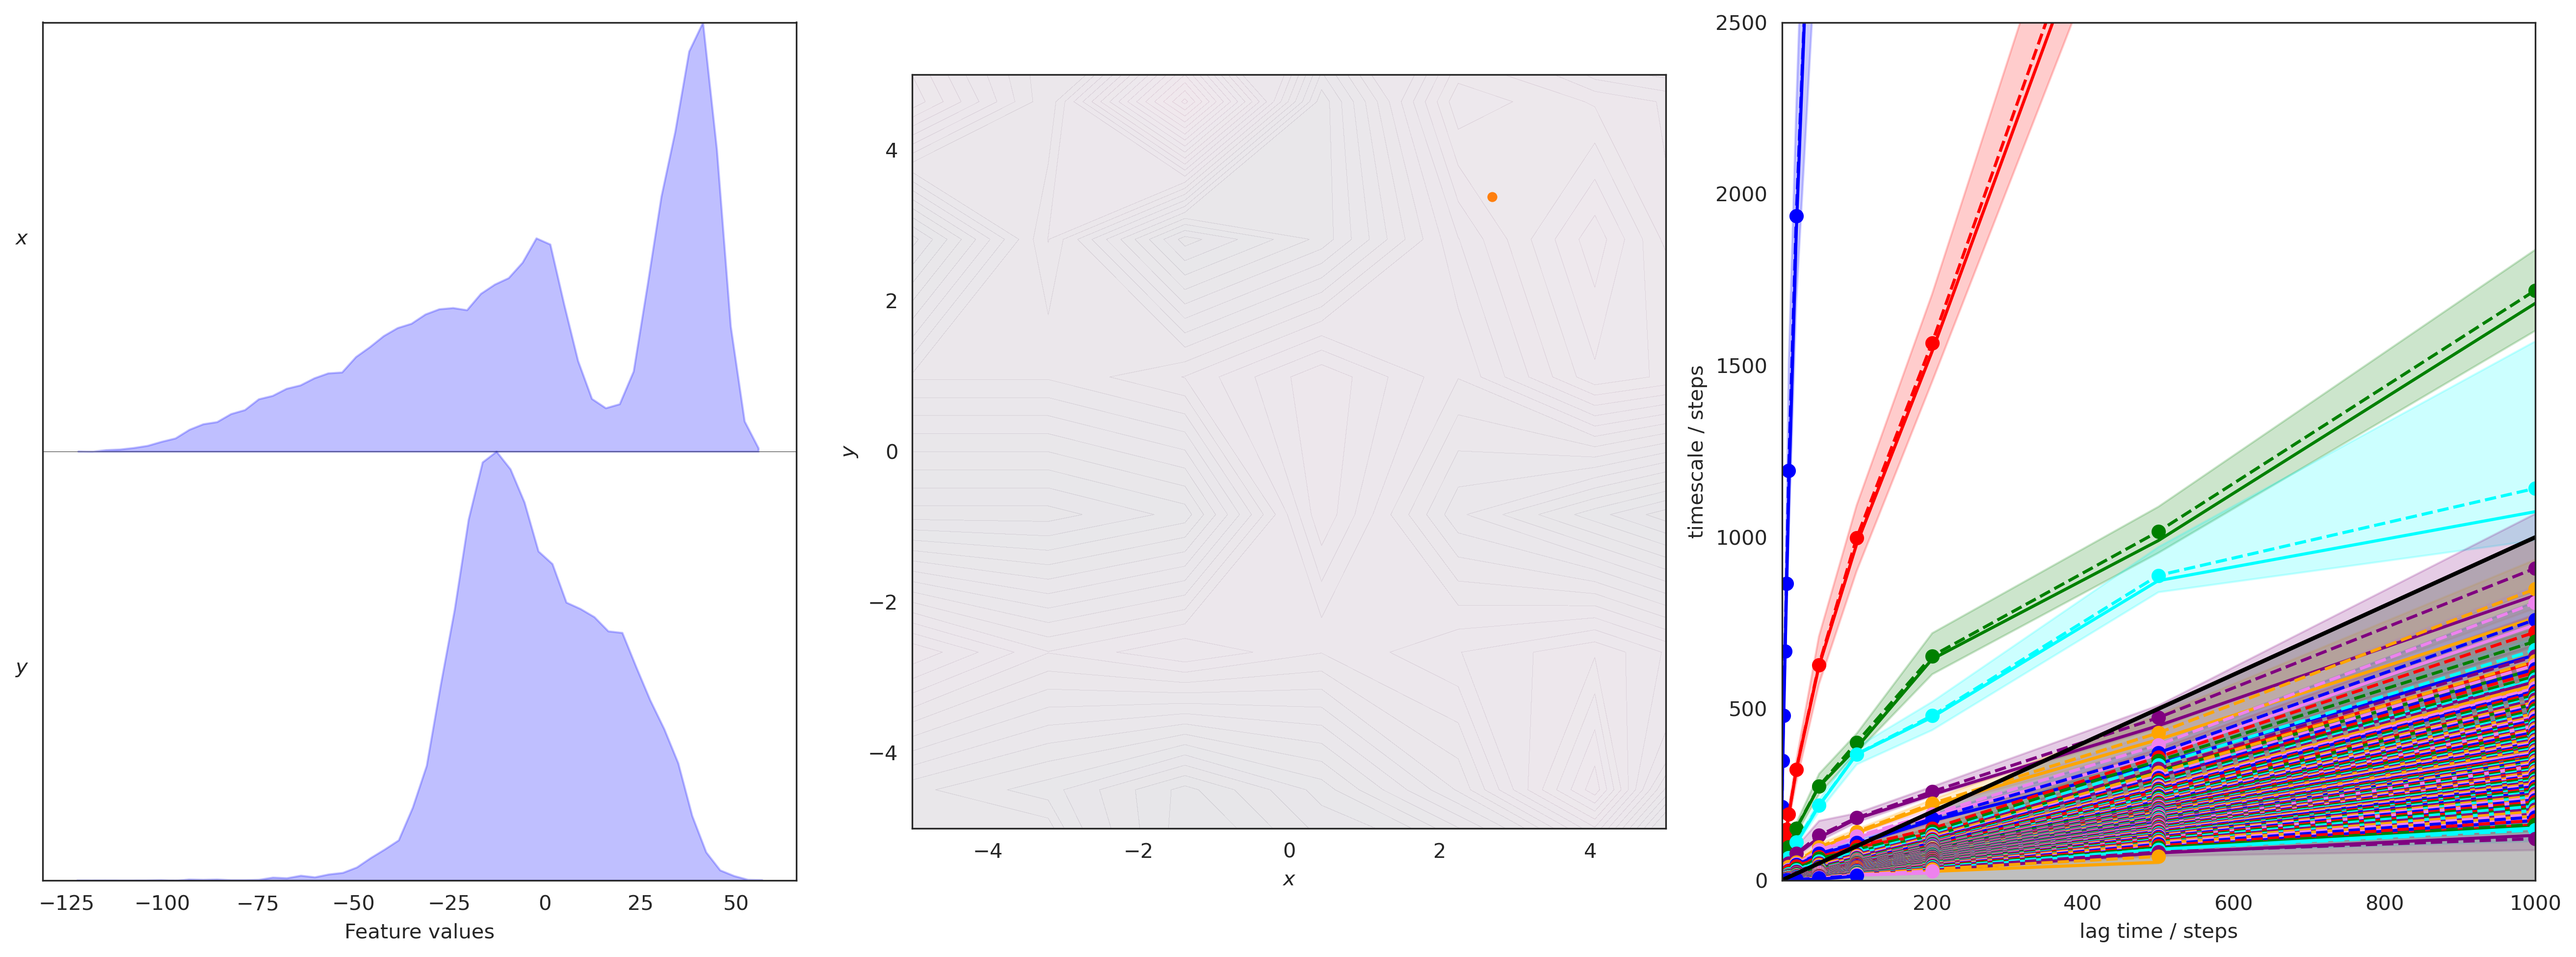

In [49]:
its = pyemma.msm.its(cluster.dtrajs, lags=[1, 2, 3, 5, 7, 10, 20, 50, 100, 200, 500, 1000], nits=None, errors='bayes', n_jobs=1)
#    cluster.dtrajs, lags=[1, 50, 100], nits=None, errors='bayes', n_jobs=12)

fig, axes = plt.subplots(1, 3, figsize=(17.6, 6.6), dpi=300)
pyemma.plots.plot_feature_histograms(data12, feature_labels=['$x$', '$y$'], ax=axes[0])
pyemma.plots.plot_density(*data12.T, ax=axes[1], cbar=False, alpha=0.1)
axes[1].scatter(*cluster.clustercenters.T, s=15, c='C1')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
axes[1].set_xlim(-5,5)
axes[1].set_ylim(-5,5)
axes[1].set_aspect('equal')
pyemma.plots.plot_implied_timescales(its, ylog=False, ax=axes[2])
axes[2].set_ylim(0,2500)
fig.tight_layout()
#any lag time before the slow process (blue line) crosses the lag time threshold (black line) would work. To maximize the kinetic resolution, we choose the lag time 1 step

In [50]:
bayesian_msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=1, conf=0.95, dt_traj='10 ps')

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 541.73it/s]


In [51]:
bayesian_msm.active_state_indexes

array([array([[   0,  479],
              [   0,  483],
              [   0,  484],
              [   0,  577],
              [   0,  580],
              [   0,  602],
              [   0,  651],
              [   0,  652],
              [   0,  656],
              [   0,  665],
              [   0,  680],
              [   0,  771],
              [   0,  772],
              [   0,  778],
              [   0, 1066],
              [   0, 1096],
              [   0, 1106],
              [   0, 1161],
              [   0, 1162],
              [   0, 1164],
              [   0, 1181],
              [   0, 1188],
              [   0, 1221],
              [   0, 1260],
              [   0, 1265],
              [   0, 1267],
              [   0, 1301],
              [   0, 1333],
              [   0, 1345],
              [   0, 1346],
              [   0, 1362],
              [   0, 1369],
              [   0, 1405],
              [   0, 1410],
              [   0, 1411],
              [   0,

In [86]:
states = 3
nstates = states
bymsm = bayesian_msm.pcca(nstates)

In [87]:
type(bymsm)

pyemma.msm.models.pcca.PCCA

In [88]:
metastable_traj = bayesian_msm.metastable_assignments[dtrajs_concatenated]
metastable_traj_1 = bayesian_msm.metastable_assignments[cluster.dtrajs[0]]
metastable_traj_2 = bayesian_msm.metastable_assignments[cluster.dtrajs[1]]
metastable_traj_3 = bayesian_msm.metastable_assignments[cluster.dtrajs[2]]
metastable_traj_4 = bayesian_msm.metastable_assignments[cluster.dtrajs[3]]
metastable_traj_5 = bayesian_msm.metastable_assignments[cluster.dtrajs[4]]

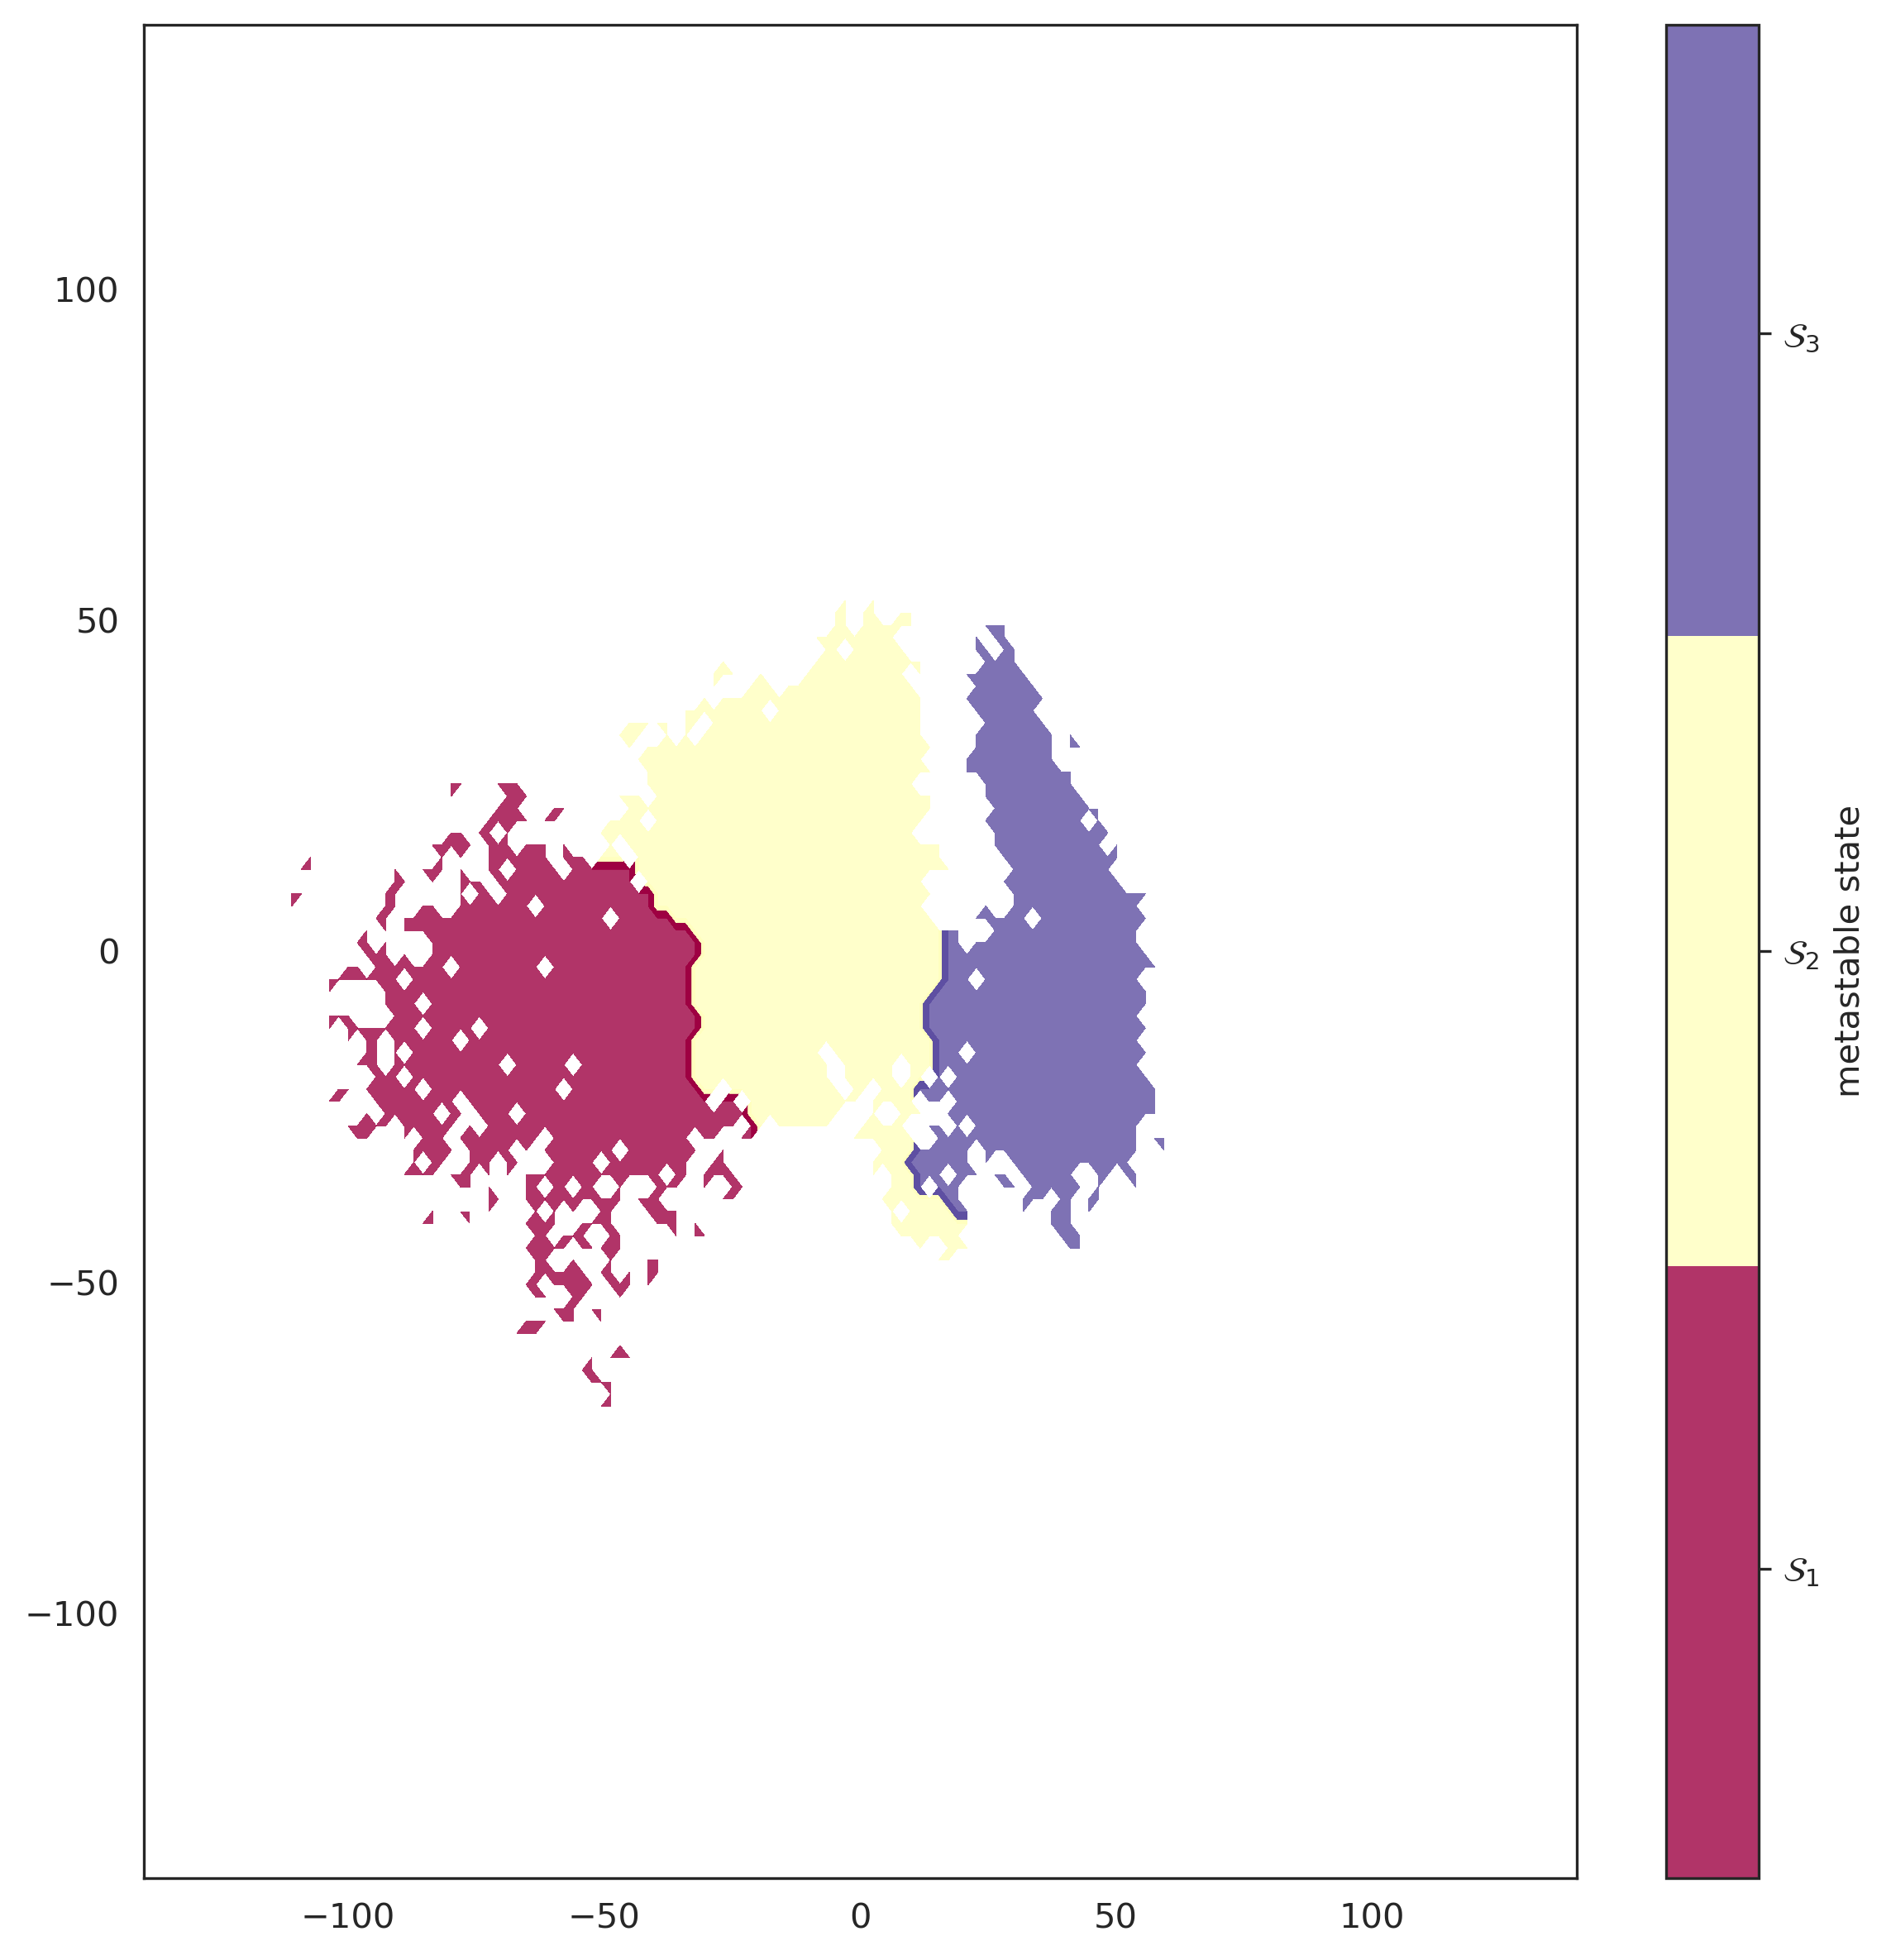

In [90]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
_, _, misc = pyemma.plots.plot_state_map(
    *np.concatenate([data12_1,data12_2,data12_3,data12_4,data12_5])[:, :2].T, metastable_traj, ax=ax, cbar_label='metastable state', cmap='Spectral', cbar_orientation='vertical', alpha=0.8)
#ax.set_xlabel('IC 1')
#ax.set_ylabel('IC 2')
ax.set_xlim(-140,140)
ax.set_ylim(-140,140)
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
plt.savefig("MS_A293_47", format="png") 

In [91]:
bayesian_msm.discrete_trajectories_full;

In [92]:
full = np.concatenate(bayesian_msm.discrete_trajectories_full)

In [93]:
bayesian_msm.metastable_sets

[array([ 3,  5,  9, 10, 12, 19, 21, 23, 31, 32, 34, 37, 39, 41, 42, 45, 53,
        56, 57, 58, 59, 60, 62, 64, 65, 72, 73, 76, 80, 84, 85, 87, 97]),
 array([ 1,  4,  7,  8, 11, 13, 16, 18, 24, 27, 29, 30, 35, 36, 38, 43, 44,
        46, 47, 48, 49, 51, 52, 55, 67, 69, 74, 79, 82, 86, 88, 89, 90, 91,
        92, 93, 94, 95]),
 array([ 0,  2,  6, 14, 15, 17, 20, 22, 25, 26, 28, 33, 40, 50, 54, 61, 63,
        66, 68, 70, 71, 75, 77, 78, 81, 83, 96, 98, 99])]

In [94]:
metastable_traj_1.shape

(3499,)

In [95]:
metastable_traj_2.shape

(3499,)

In [96]:
metastable_traj_3.shape

(3499,)

In [97]:
metastable_traj_4.shape

(3499,)

In [98]:
metastable_traj_5.shape

(3499,)

In [99]:
metastable_sets = bayesian_msm.metastable_sets
nstates = states
for i in range(nstates):
    try:
        locals()['set{}'.format(i)] = metastable_sets[i]
        print('Set {}: {}'.format(i, metastable_sets[i]))
    except IndexError:
        print('Warning: Not enough metastable sets for {} states'.format(nstates))
        break


Set 0: [ 3  5  9 10 12 19 21 23 31 32 34 37 39 41 42 45 53 56 57 58 59 60 62 64
 65 72 73 76 80 84 85 87 97]
Set 1: [ 1  4  7  8 11 13 16 18 24 27 29 30 35 36 38 43 44 46 47 48 49 51 52 55
 67 69 74 79 82 86 88 89 90 91 92 93 94 95]
Set 2: [ 0  2  6 14 15 17 20 22 25 26 28 33 40 50 54 61 63 66 68 70 71 75 77 78
 81 83 96 98 99]


In [106]:
P = bymsm.coarse_grained_transition_matrix
T = P.clip(min=0)
print(T)

[[0.98602138 0.01411468 0.        ]
 [0.00836193 0.9884402  0.00319787]
 [0.         0.00409396 0.99653871]]


In [107]:
print(T[0].sum())
print(T[1].sum())
print(T[2].sum())


1.0001360655625309
0.9999999999999998
1.000632665911989


In [108]:
A = T[0]/T[0].sum()
B = T[1]/T[1].sum()
C = T[2]/T[2].sum()


In [109]:
print(A.sum())
print(B.sum())
print(C.sum())


1.0
1.0
1.0


In [110]:
P = np.stack((A,B,C),axis=0)
print(P)

[[0.98588724 0.01411276 0.        ]
 [0.00836193 0.9884402  0.00319787]
 [0.         0.00409137 0.99590863]]


In [111]:
bymsm.stationary_probability;

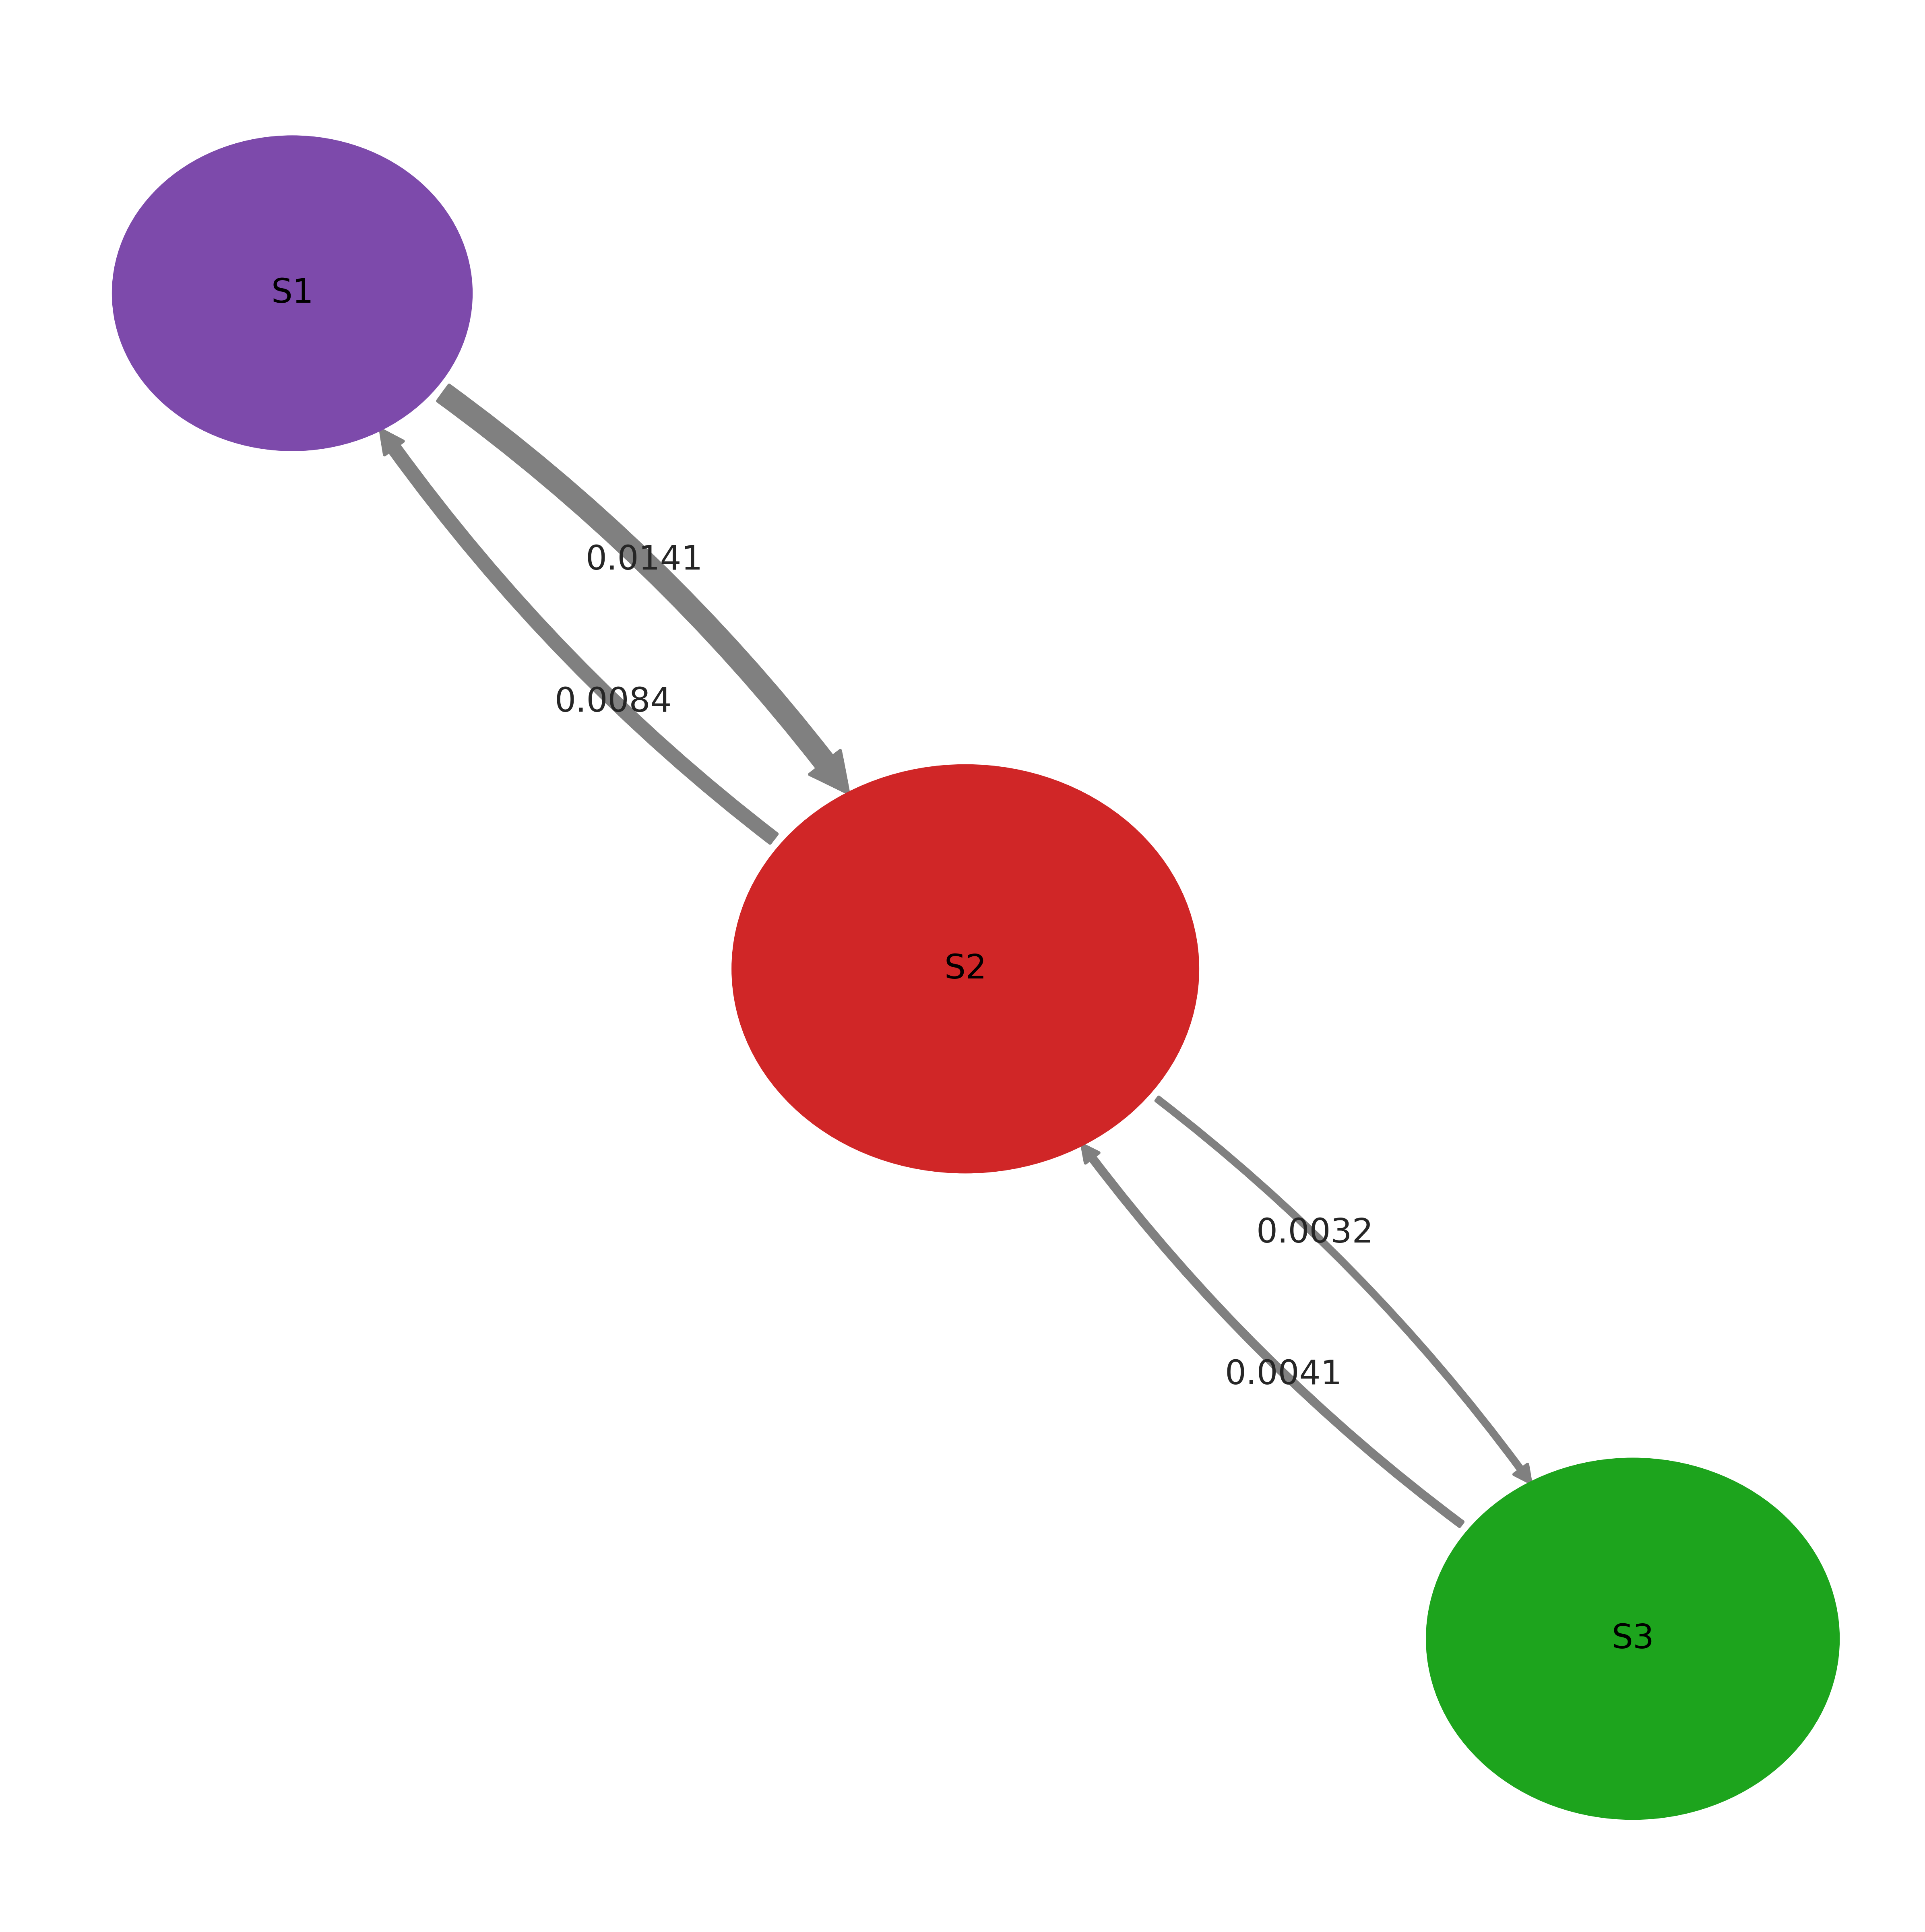

In [122]:
M = msm.markov_model(P)
#pos = np.array([[-3.0,0.0],[-2.0,2.0],[-1.5,0.0],[0.0,-2.0],[0.0,0.0]])
fig, misc =mplt.plot_markov_model(M, state_labels=['S1','S2','S3',], state_colors=['#7d4aab', '#d02627', '#1da41d'], arrow_label_format='%.4f');
fig.tight_layout()
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.set_dpi(600)
plt.savefig("FE_labs_transitions_bb.png", format="png")

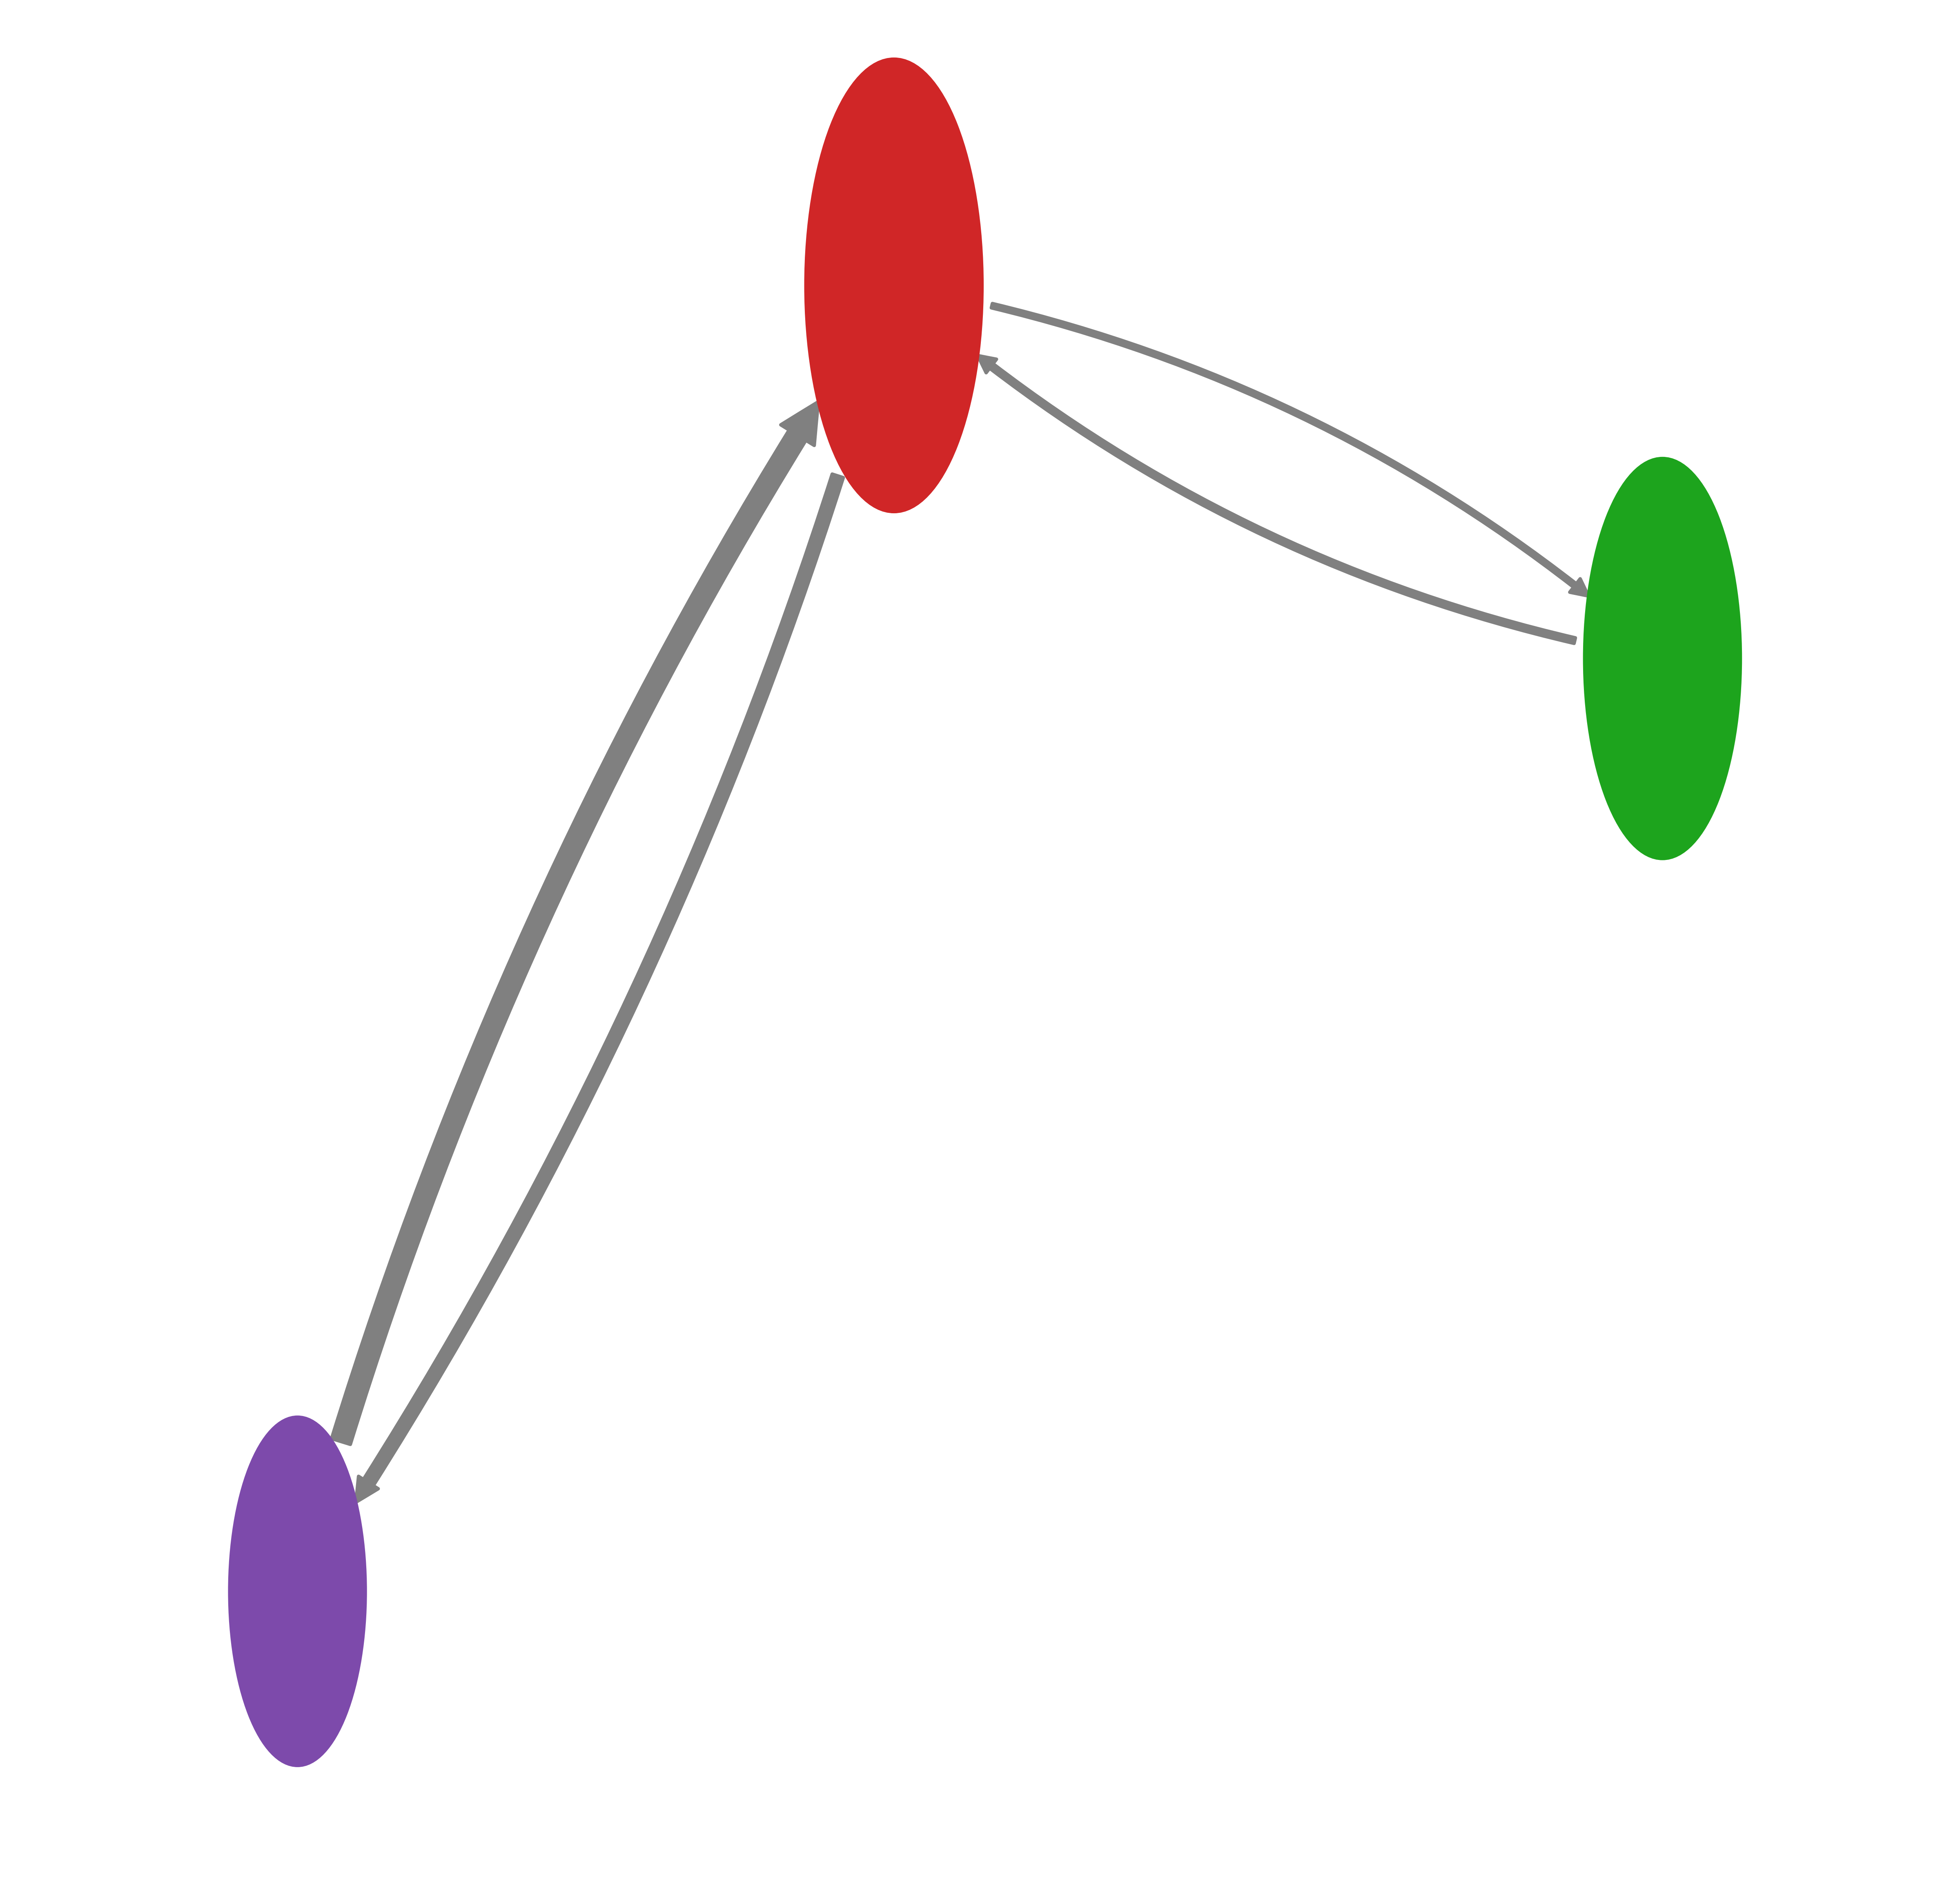

In [127]:
M = msm.markov_model(P)
#pos = np.array([[-3.0,0.0],[-2.0,2.0],[-1.5,0.0],[0.0,-2.0],[0.0,0.0]])
fig, misc =mplt.plot_markov_model(M, state_labels=None, state_colors=['#7d4aab', '#d02627', '#1da41d'], arrow_labels = None , arrow_label_format='%.4f');
fig.tight_layout()
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.set_dpi(600)
plt.savefig("FE_labs_transitions_bb_nolabel.png", format="png")

In [116]:
metastable_traj_num = metastable_traj 

In [117]:
df = pd.DataFrame({
    'State': metastable_traj_num,
    'PC1': comp1,
    'PC2': comp2
})

# Add a column with the number of lines
df['line_number'] = np.arange(1, len(df) + 1)

# Display the resulting DataFrame
print(df)

ValueError: All arrays must be of the same length